<a href="https://colab.research.google.com/github/highquanglity/Assignment_1/blob/main/MTCNN_facedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 28.2 MB/s 


In [ ]:
!mkdir images

In [ ]:
!wget 'https://cdn.vox-cdn.com/thumbor/FK9HzbctCFisedQcg-n1rr7IETQ=/0x0:3736x2491/1200x675/filters:focal(1554x462:2150x1058)/cdn.vox-cdn.com/uploads/chorus_image/image/71443592/1429657204.0.jpg' -P images

--2022-10-03 08:24:27--  https://cdn.vox-cdn.com/thumbor/FK9HzbctCFisedQcg-n1rr7IETQ=/0x0:3736x2491/1200x675/filters:focal(1554x462:2150x1058)/cdn.vox-cdn.com/uploads/chorus_image/image/71443592/1429657204.0.jpg
Resolving cdn.vox-cdn.com (cdn.vox-cdn.com)... 199.232.192.124, 199.232.196.124
Connecting to cdn.vox-cdn.com (cdn.vox-cdn.com)|199.232.192.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117943 (115K) [image/jpeg]
Saving to: ‘images/1429657204.0.jpg’

1429657204.0.jpg    100%[===================>] 115.18K  --.-KB/s    in 0.004s  

2022-10-03 08:24:27 (31.5 MB/s) - ‘images/1429657204.0.jpg’ saved [117943/117943]



In [ ]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [ ]:
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
%matplotlib inline

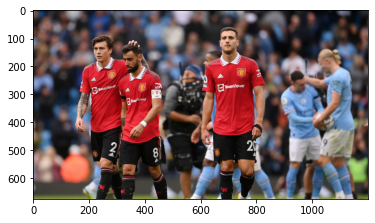

In [ ]:
# load image from file
pixels = plt.imread('/content/images/1429657204.0.jpg')
plt.imshow(pixels)

In [ ]:
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(pixels)

In [ ]:
results

[{'box': [12, 83, 42, 53],
  'confidence': 0.9999847412109375,
  'keypoints': {'left_eye': (25, 104),
   'right_eye': (44, 102),
   'nose': (37, 113),
   'mouth_left': (28, 124),
   'mouth_right': (46, 122)}},
 {'box': [348, 43, 32, 43],
  'confidence': 0.9999696016311646,
  'keypoints': {'left_eye': (357, 58),
   'right_eye': (373, 58),
   'nose': (366, 68),
   'mouth_left': (358, 76),
   'mouth_right': (372, 76)}},
 {'box': [506, 54, 41, 53],
  'confidence': 0.9999595880508423,
  'keypoints': {'left_eye': (517, 74),
   'right_eye': (536, 76),
   'nose': (524, 84),
   'mouth_left': (518, 94),
   'mouth_right': (534, 96)}},
 {'box': [635, 68, 45, 52],
  'confidence': 0.9999411106109619,
  'keypoints': {'left_eye': (644, 88),
   'right_eye': (662, 83),
   'nose': (654, 97),
   'mouth_left': (652, 109),
   'mouth_right': (667, 105)}},
 {'box': [368, 122, 61, 82],
  'confidence': 0.999940037727356,
  'keypoints': {'left_eye': (396, 158),
   'right_eye': (421, 156),
   'nose': (413, 174),


In [ ]:
# draw an image with detected objects
def draw_facebox(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
        # draw the box
        ax.add_patch(rect)
        # show the plot
    plt.show()

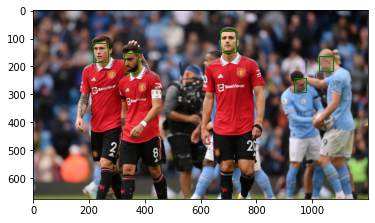

In [ ]:
draw_facebox('/content/images/1429657204.0.jpg', results)

In [ ]:
# draw an image with detected objects
def draw_facebox_and_keypoints(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = plt.Circle(value, radius=1, color='red')
            ax.add_patch(dot)
            # show the plot
    plt.show()# filename = 'test1.jpg' # filename is defined above, otherwise uncomment

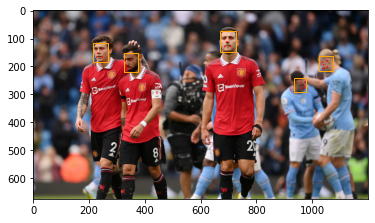

In [ ]:
draw_facebox_and_keypoints('/content/images/1429657204.0.jpg', results)